In [3]:
import csv
import re

def translator(user_string):
    user_string = user_string.split(" ")
    j = 0
    for _str in user_string:
        # File path which consists of Abbreviations.
        fileName = "slang.txt"
        # File Access mode [Read Mode]
        accessMode = "r"
        with open(fileName, accessMode) as myCSVfile:
            # Reading file as CSV with delimiter as "=", so that abbreviation are stored in row[0] and phrases in row[1]
            dataFromFile = csv.reader(myCSVfile, delimiter="=")
            # Removing Special Characters.
            _str = re.sub('[^a-zA-Z0-9-_.]', '', _str)
            for row in dataFromFile:
                # Check if selected word matches short forms[LHS] in text file.
                if _str.upper() == row[0]:
                    # If match found replace it with its appropriate phrase in text file.
                    return 1
            myCSVfile.close()
        j = j + 1
    return 0
import pandas as pd
data=pd.read_csv(r"spam.csv",encoding="ISO-8859-1")

data['shorthands']= data['Message'].apply(translator)
data.head()



,Category,Message,shorthands
0,ham,"Go until jurong point, crazy.. Available only ...",1
1,ham,Ok lar... Joking wif u oni...,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",1


In [4]:
data.to_csv(r'C:\Users\lenovo pc\downloads\spam1.csv')

In [5]:
df=data.loc[data['shorthands'] == 0]
k=[]
k.append(df.loc[df['Category']=="ham"].shape[0])
k.append(df.loc[df['Category']=="spam"].shape[0])
print(k)

[1350, 147]


In [6]:
df=data.loc[data['shorthands'] == 1]
x=[]
x.append(df.loc[df['Category']=="ham"].shape[0])
x.append(df.loc[df['Category']=="spam"].shape[0])
print(x)

[3475, 600]


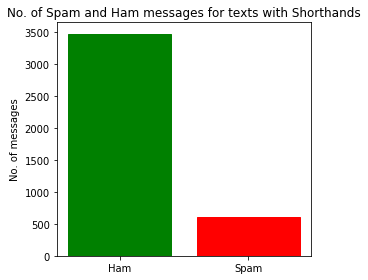

In [23]:
import matplotlib.pyplot as plt
import numpy as np
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 5.0
fig_size[1] = 4.0
y= ["Ham","Spam"]
y_pos = np.arange(len(y))
fig, ax = plt.subplots()
b=plt.bar(y_pos, x,  align='center',alpha=1.0)
b[0].set_color("green")
b[1].set_color("red")
plt.xticks(y_pos, y)
plt.ylabel('No. of messages')
plt.title('No. of Spam and Ham messages for texts with Shorthands')
plt.tight_layout()
plt.savefig("Shorthands_bar.jpg",dpi=300)

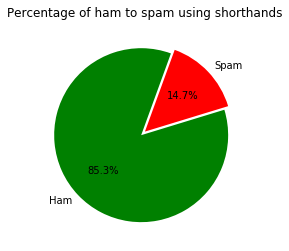

In [17]:
import matplotlib.pyplot as plt1
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 6.0
fig_size[1] = 4.0
colors = ['green', 'red']
sizes=x
explode=(0.06,0)
plt1.pie(sizes, labels=y, explode=explode, colors=colors, autopct='%1.1f%%', shadow=False, startangle=70)
plt1.title("Percentage of ham to spam using shorthands")
plt1.savefig("Shorthands_pie.jpg",dpi=300)
plt1.show()

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


a=data[data['Category'] == 'ham']['shorthands'].sum()
aa=a/5572
print(aa)

a=data[data['Category'] == 'spam']['shorthands'].sum()
d=a/5572
print(d)
a1=[aa,d]

0.623653984206748
0.10768126346015794


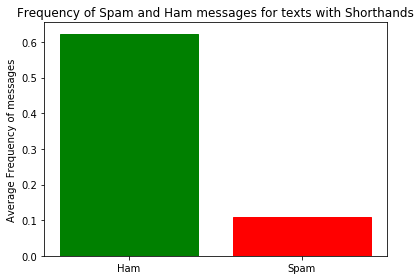

In [30]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 6.0
fig_size[1] = 4.0
y= ["Ham","Spam"]
y_pos = np.arange(len(y))
fig, ax = plt.subplots()
b=plt.bar(y_pos, a1,  align='center',alpha=1.0)
b[0].set_color("green")
b[1].set_color("red")
plt.xticks(y_pos, y)
plt.ylabel('Average Frequency of messages')
plt.title('Frequency of Spam and Ham messages for texts with Shorthands')
plt.tight_layout()
plt.savefig("Shorthands_freq.jpg",dpi=300)